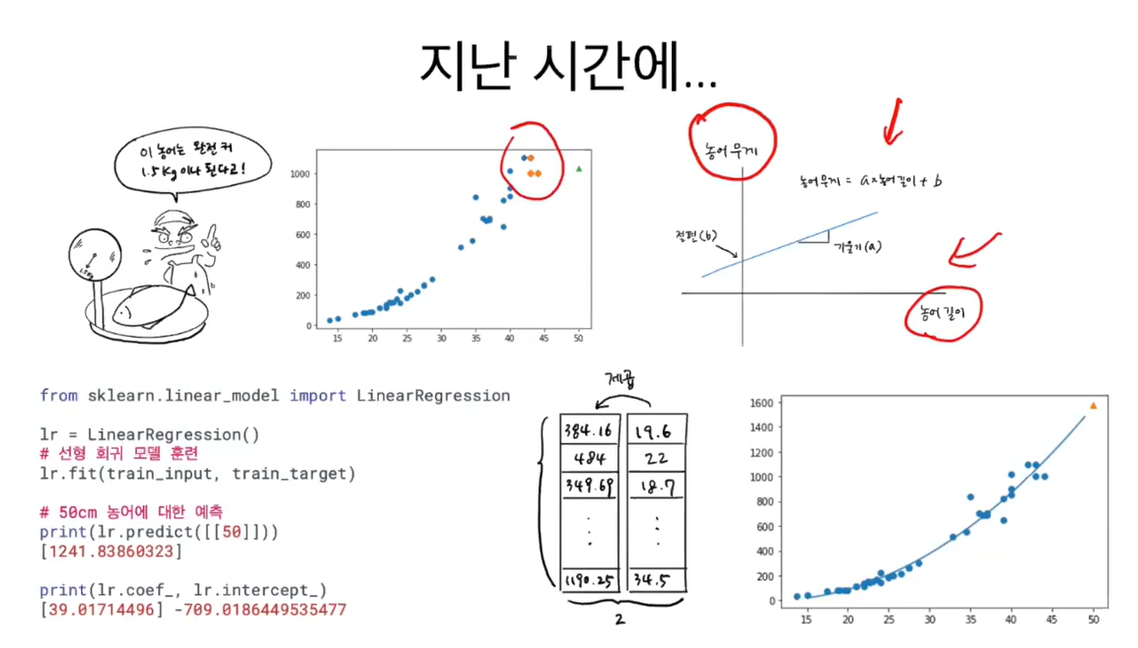

- 다중 회귀 : 여러 개의 특성을 사용한 선형 회귀

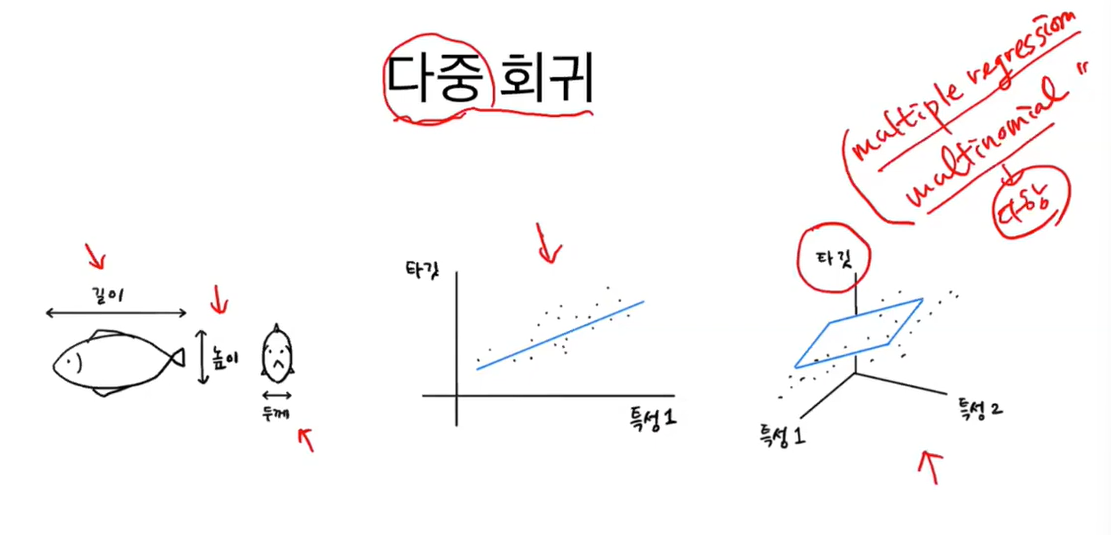

**특성공학**
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

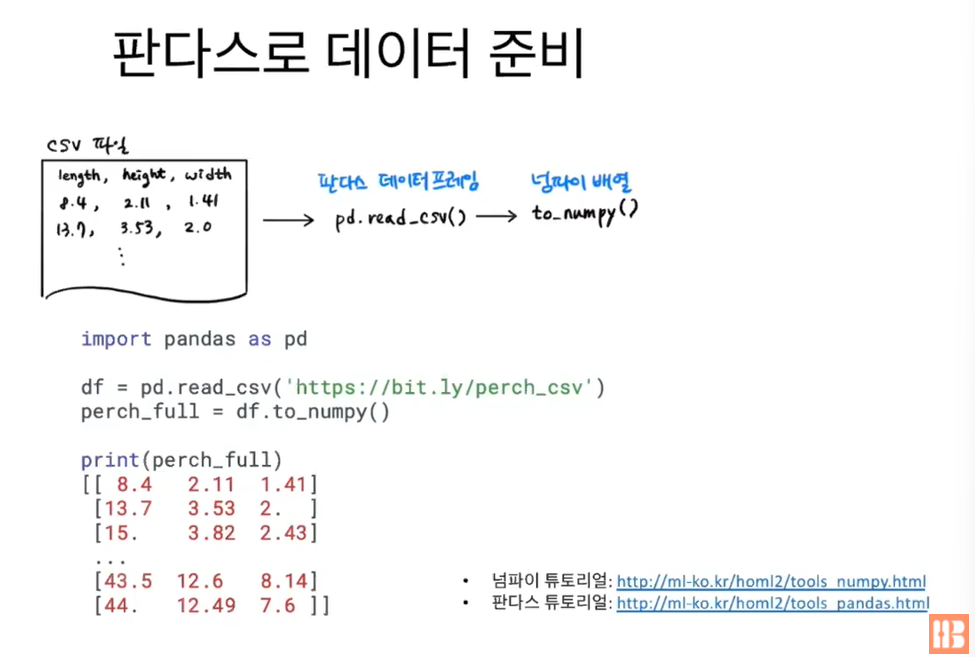

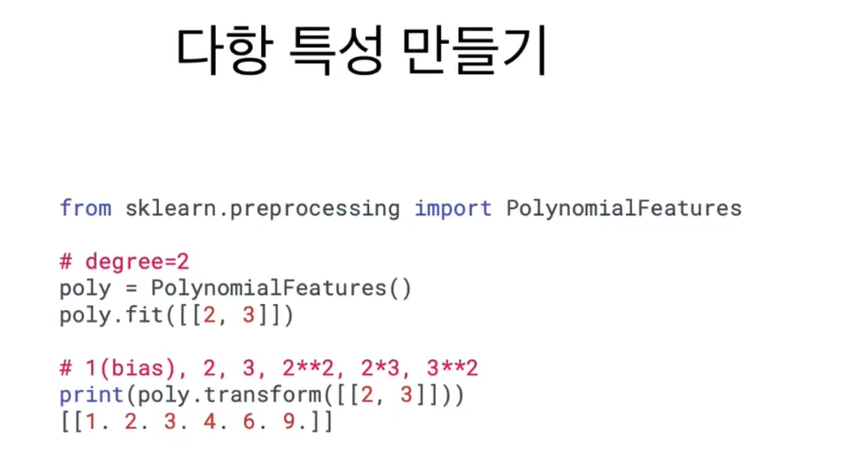

- degree = 2 가 default값임
- degree가 크면 특성이 많아짐

In [1]:
 import pandas as pd
 df = pd.read_csv('https://bit.ly/perch_csv_data')
 perch_full= df.to_numpy() # dataframe을 numpy 형태로 변환함
 print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state = 42)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


- 절편값 1이 추가된 것을 확인

In [5]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [6]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [8]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [10]:
test_poly = poly.transform(test_input)

In [11]:
test_poly

array([[8.400000e+00, 2.110000e+00, 1.410000e+00, 7.056000e+01,
        1.772400e+01, 1.184400e+01, 4.452100e+00, 2.975100e+00,
        1.988100e+00],
       [1.800000e+01, 5.220000e+00, 3.320000e+00, 3.240000e+02,
        9.396000e+01, 5.976000e+01, 2.724840e+01, 1.733040e+01,
        1.102240e+01],
       [2.750000e+01, 7.280000e+00, 4.570000e+00, 7.562500e+02,
        2.002000e+02, 1.256750e+02, 5.299840e+01, 3.326960e+01,
        2.088490e+01],
       [2.130000e+01, 6.380000e+00, 3.530000e+00, 4.536900e+02,
        1.358940e+02, 7.518900e+01, 4.070440e+01, 2.252140e+01,
        1.246090e+01],
       [2.250000e+01, 5.860000e+00, 3.620000e+00, 5.062500e+02,
        1.318500e+02, 8.145000e+01, 3.433960e+01, 2.121320e+01,
        1.310440e+01],
       [4.000000e+01, 1.114000e+01, 6.630000e+00, 1.600000e+03,
        4.456000e+02, 2.652000e+02, 1.240996e+02, 7.385820e+01,
        4.395690e+01],
       [3.000000e+01, 7.620000e+00, 4.770000e+00, 9.000000e+02,
        2.286000e+02, 1.431000

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))

0.9903183436982124


In [13]:
print(lr.score(test_poly,test_target))

0.9714559911594134


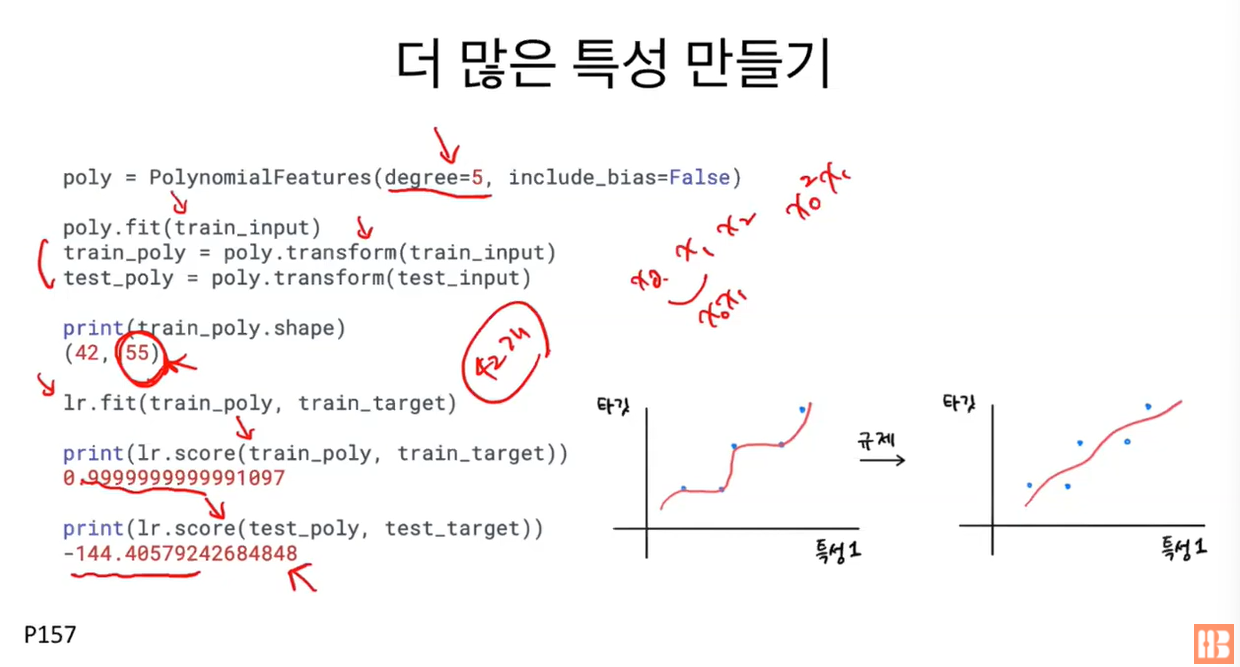

In [14]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


- degree를 통하여 특성을 높여주었음

In [15]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [16]:
print(lr.score(test_poly,test_target))

-144.40579242684848


- 과대적합이 일어난 것을 볼 수 있음

- 규제(regularization)으로 과대적합이 일어나지 않도록 만듦

- 가중치에 벌칙을 내리는 방법으로 규제를 함
  - 특성의 값이 비슷해져야 가능
    - 따라서 특성의 스케일을 조정해야함

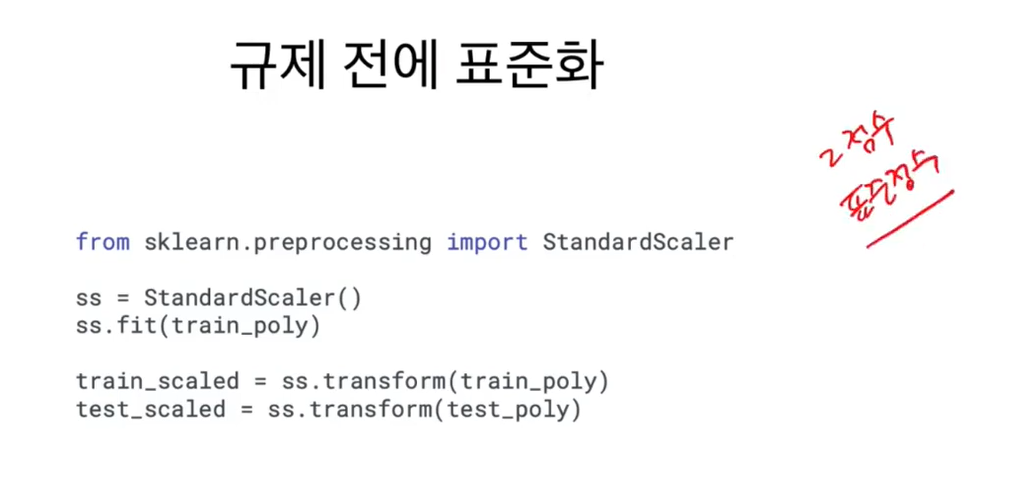

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
print(train_scaled)
print(test_scaled) # 정규화 과정을 거침

[[-1.01339619 -1.01007487 -1.01952321 ... -0.76449499 -0.75967179
  -0.75143746]
 [-0.73842893 -0.75254307 -0.74466913 ... -0.73198449 -0.72731765
  -0.71950111]
 [-1.11650891 -0.98919391 -0.97371419 ... -0.76114089 -0.75592147
  -0.74734146]
 ...
 [-0.32597805 -0.51589222 -0.33238802 ... -0.65673421 -0.64237495
  -0.62509499]
 [ 1.55296488  1.65572732  1.17358328 ...  1.45958191  1.19906225
   0.95977016]
 [ 0.6936922   0.7717668   0.8987292  ...  0.3701756   0.40321427
   0.43089551]]
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0

- 선형 회귀 모델에 규제를 추가한 모델이 **릿지** **라쏘**

- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 : 계수의 절댓값을 기준으로 규제를 적용
  - 일반적으로 릿지를 더 선호함

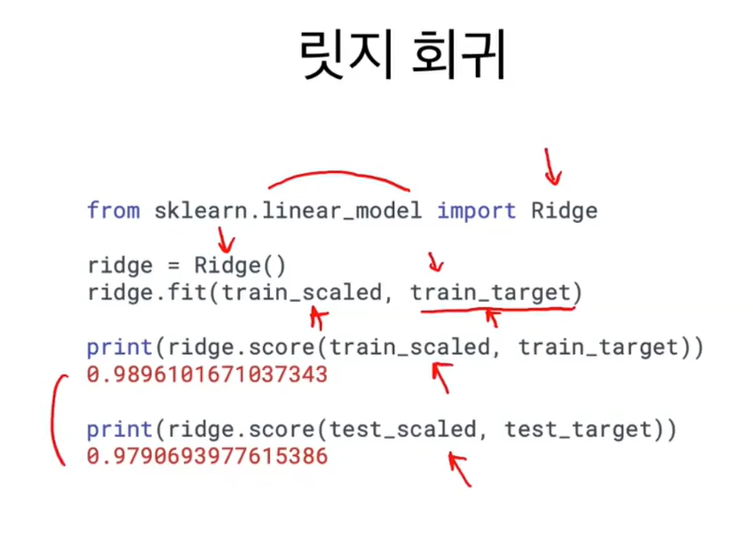

In [18]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615397


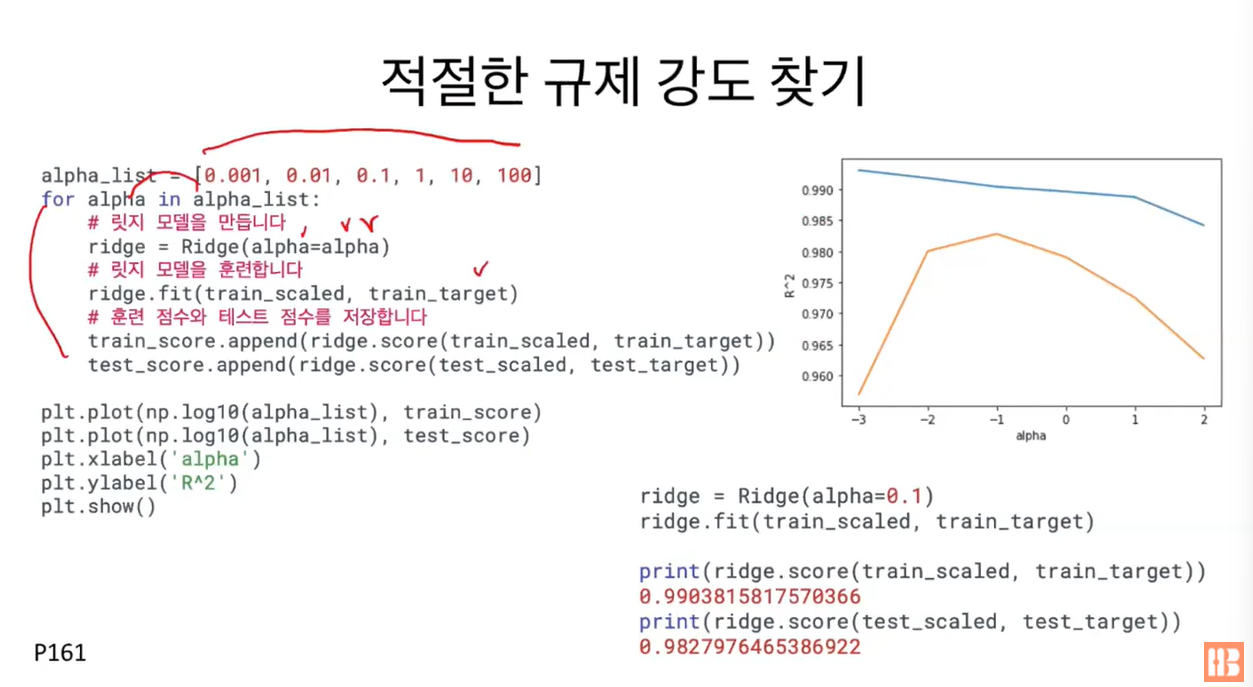

In [19]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  # 릿지 모델을 만듦
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련함
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장함
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

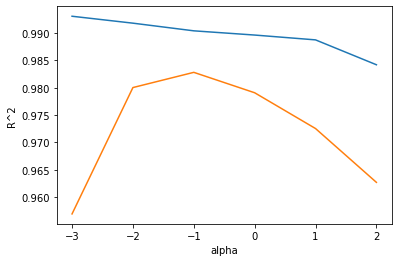

In [21]:
# x축을 log10을 통하여 작게 나타내줌
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

- alpha 값이 0.1일 때 test score가 높은 것을 확인

In [22]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


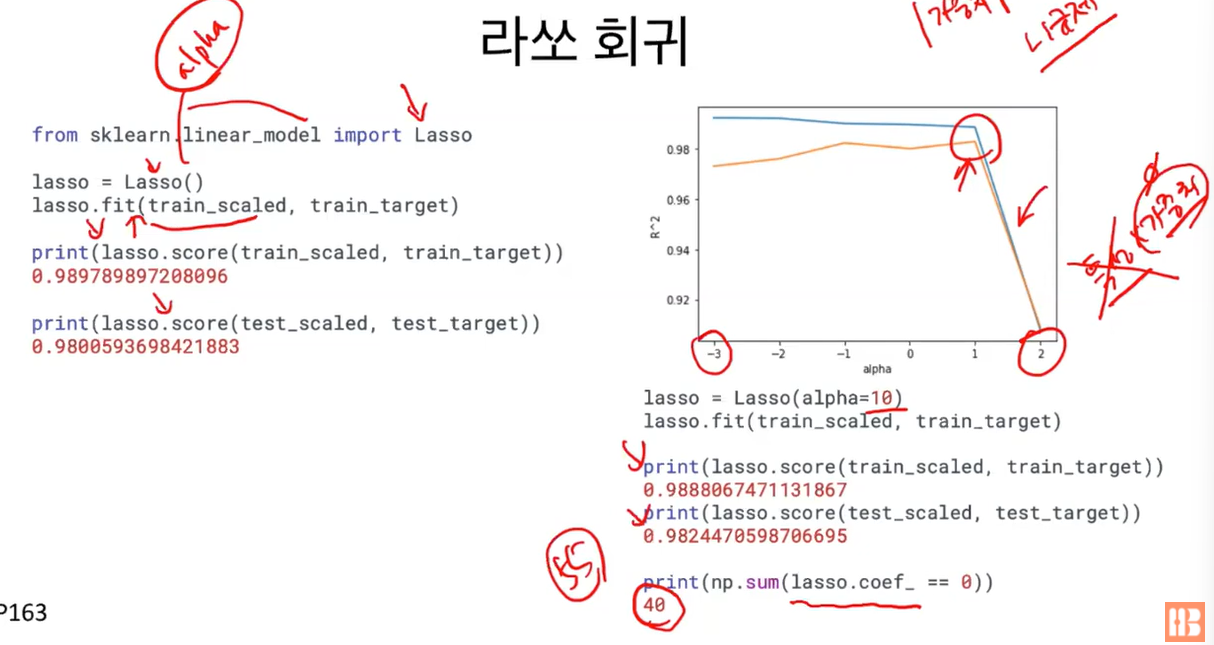

- 라쏘는 릿지와 매우 비슷함

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [24]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [25]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
  # 라쏘 모델을 만듦
  lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter은 최대 반복 횟수
  # 라쏘 모델을 훈련함
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장함
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


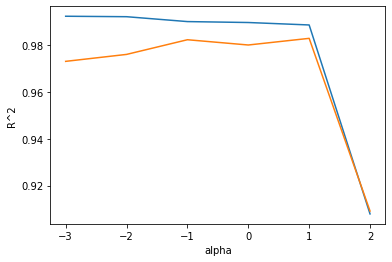

In [26]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [27]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


- 라쏘에서 성능이 더 좋았음
- 라쏘는 계수 값을 아예 0으로 만들 수 있음

In [28]:
print(np.sum(lasso.coef_ == 0))

40


- 40개의 계수가 0이 된 것을 볼 수 있음
- 55개의 특성이 주입됐지만 실제 사용한 특성은 15개밖에 안됨